# Task 3: Customer Churn Prediction (Bank Customers)

***Objective:***

*Identify customers who are likely to leave the bank.*


In [ ]:
# Libriries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



---



●	Clean and prepare the dataset.

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()  # Dataset is already clean

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0




---



*●	Encode categorical features such as geography and gender.*

In [ ]:
# First drop unnecessary columns
df= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
cat_cols = ['Geography', 'Gender']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1




---



*●	Train a classification model.*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# I am choosing logistic regression classification model:
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6196,698,29,5,95167.55,1,1,1,152723.23,0,0,1
9232,618,49,9,44301.43,3,1,1,89729.30,0,0,0
2042,667,27,3,106116.50,2,1,0,3674.71,1,0,0
449,778,47,6,127299.34,2,1,0,124694.99,0,1,0
4215,789,53,1,158271.74,1,1,1,5036.39,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4800,690,39,6,0.00,2,1,0,160532.88,0,0,1
3750,629,39,2,129669.32,2,1,0,82774.07,0,0,1
6442,491,33,5,83134.30,1,1,0,187946.55,0,0,1
8168,597,33,2,0.00,2,1,1,4700.66,0,1,0


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.776

 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      1564
           1       0.38      0.04      0.07       436

    accuracy                           0.78      2000
   macro avg       0.58      0.51      0.47      2000
weighted avg       0.70      0.78      0.70      2000


 Confusion Matrix:
 [[1534   30]
 [ 418   18]]




---



*●	Analyze feature importance to understand what influences churn.*

In [ ]:
feature_name = X.columns
coef = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_name, 'Coefficient': coef, 'Importance' : np.abs(coef)})
feature_importance

,Feature,Coefficient,Importance
0,CreditScore,-4.968247e-03,4.968247e-03
1,Age,4.815170e-02,4.815170e-02
2,Tenure,-5.336614e-02,5.336614e-02
3,Balance,2.399675e-06,2.399675e-06
4,NumOfProducts,-4.729855e-02,4.729855e-02
5,HasCrCard,-2.048770e-02,2.048770e-02
6,IsActiveMember,-9.680238e-02,9.680238e-02
7,EstimatedSalary,4.655935e-07,4.655935e-07
8,Geography_Germany,4.947407e-02,4.947407e-02
9,Geography_Spain,-2.246048e-02,2.246048e-02


In [ ]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Coefficient,Importance
6,IsActiveMember,-9.680238e-02,9.680238e-02
10,Gender_Male,-6.706716e-02,6.706716e-02
2,Tenure,-5.336614e-02,5.336614e-02
8,Geography_Germany,4.947407e-02,4.947407e-02
1,Age,4.815170e-02,4.815170e-02
4,NumOfProducts,-4.729855e-02,4.729855e-02
9,Geography_Spain,-2.246048e-02,2.246048e-02
5,HasCrCard,-2.048770e-02,2.048770e-02
0,CreditScore,-4.968247e-03,4.968247e-03
3,Balance,2.399675e-06,2.399675e-06


/tmp/ipython-input-628070522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IsActiveMember'),
  Text(1, 0, 'Gender_Male'),
  Text(2, 0, 'Tenure'),
  Text(3, 0, 'Geography_Germany'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'NumOfProducts'),
  Text(6, 0, 'Geography_Spain'),
  Text(7, 0, 'HasCrCard'),
  Text(8, 0, 'CreditScore'),
  Text(9, 0, 'Balance'),
  Text(10, 0, 'EstimatedSalary')])

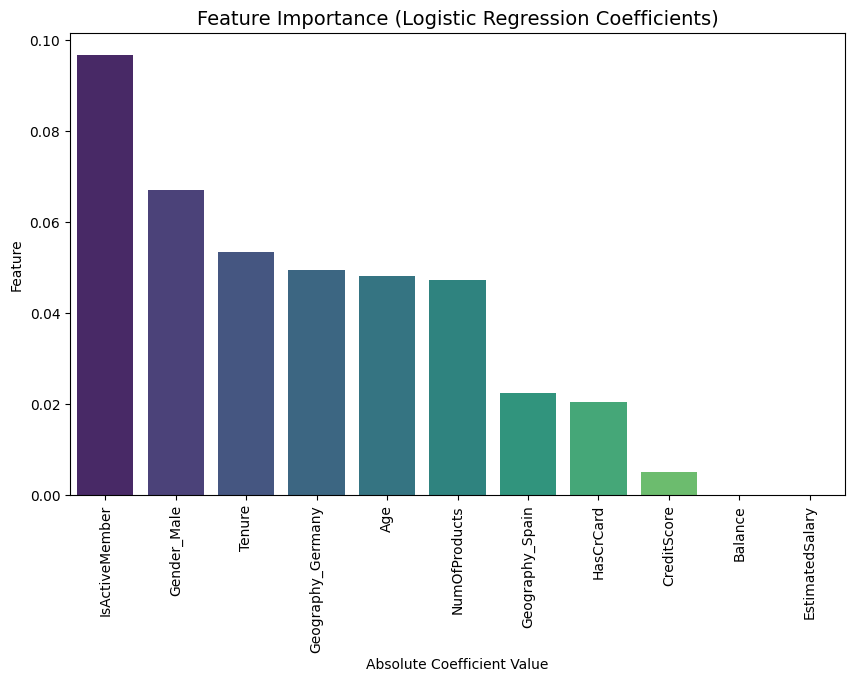

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='viridis')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression Coefficients)', fontsize = 14)
plt.xticks(rotation=90)

In [ ]:
print("Top Influential Features:\n", feature_importance.head())

Top Influential Features:
               Feature  Coefficient  Importance
6      IsActiveMember    -0.096802    0.096802
10        Gender_Male    -0.067067    0.067067
2              Tenure    -0.053366    0.053366
8   Geography_Germany     0.049474    0.049474
1                 Age     0.048152    0.048152
